In [1]:
# Importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading BikeSharing BoomBike Data
bikeSharing = pd.read_csv('day.csv')
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
print(bikeSharing.shape)
bikeSharing.info()
bikeSharing.describe()

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [4]:
bikeSharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# Data Cleaning

In [6]:
# Droping instant column as it is index column
bikeSharing.drop(['instant'], axis = 1, inplace = True)

# Dropping casual users and registered users columns as we have cnt column which is sum of the both
bikeSharing.drop(['casual'], axis = 1, inplace = True)
bikeSharing.drop(['registered'], axis = 1, inplace = True)

# Dropping dteday as we have already have month, weekday and year columns
bikeSharing.drop(['dteday'], axis = 1, inplace = True)

In [7]:
#Checking Data again
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
# From bikeSharing.info() we know that We do not have any missing and null values

In [9]:
#Checking outliers

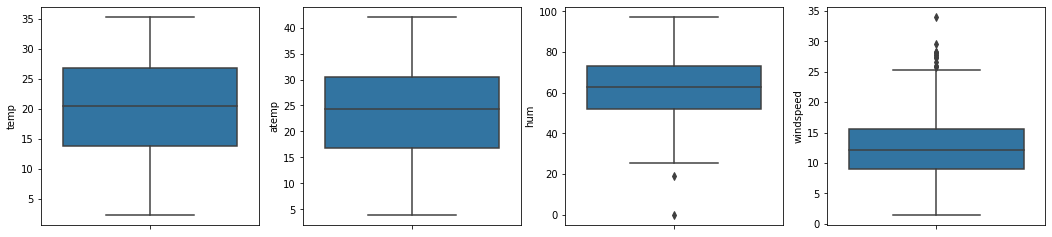

In [10]:
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing)
    i+=1
    
# From plots we can see that there is no outliers to be heandled

In [11]:
# Converting Season, Weathersit, Month and weekdays to categorical Data
'''
Weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
season : season (1:spring, 2:summer, 3:fall, 4:winter)
'''

'\nWeathersit : \n\t\t- 1: Clear, Few clouds, Partly cloudy, Partly cloudy\n\t\t- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n\t\t- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n\t\t- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog \nseason : season (1:spring, 2:summer, 3:fall, 4:winter)\n'

In [12]:
bikeSharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bikeSharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'worst'},inplace = True)
bikeSharing.mnth = bikeSharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bikeSharing.weekday = bikeSharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


<Figure size 1440x1080 with 0 Axes>

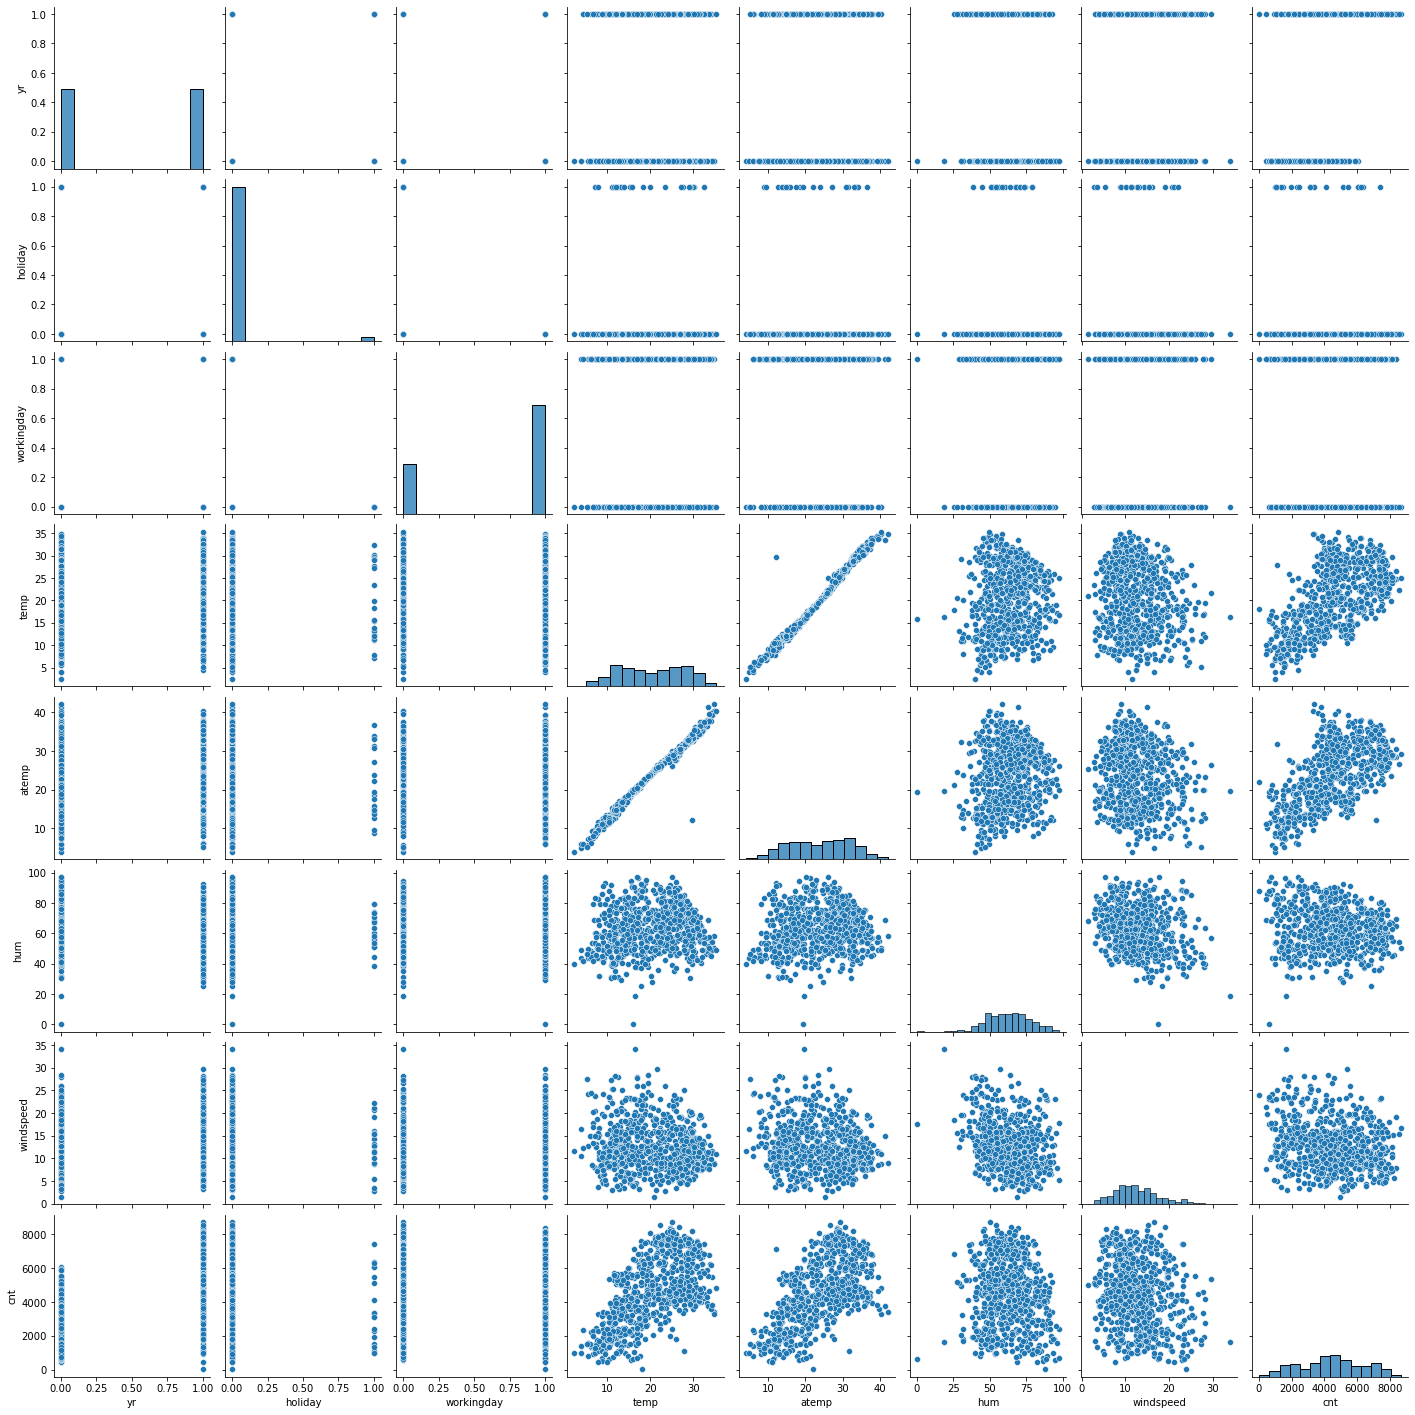

In [13]:
# Getting an idea of the relations betwween all the variables using plot
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharing)
plt.show()

<Figure size 1080x2160 with 0 Axes>

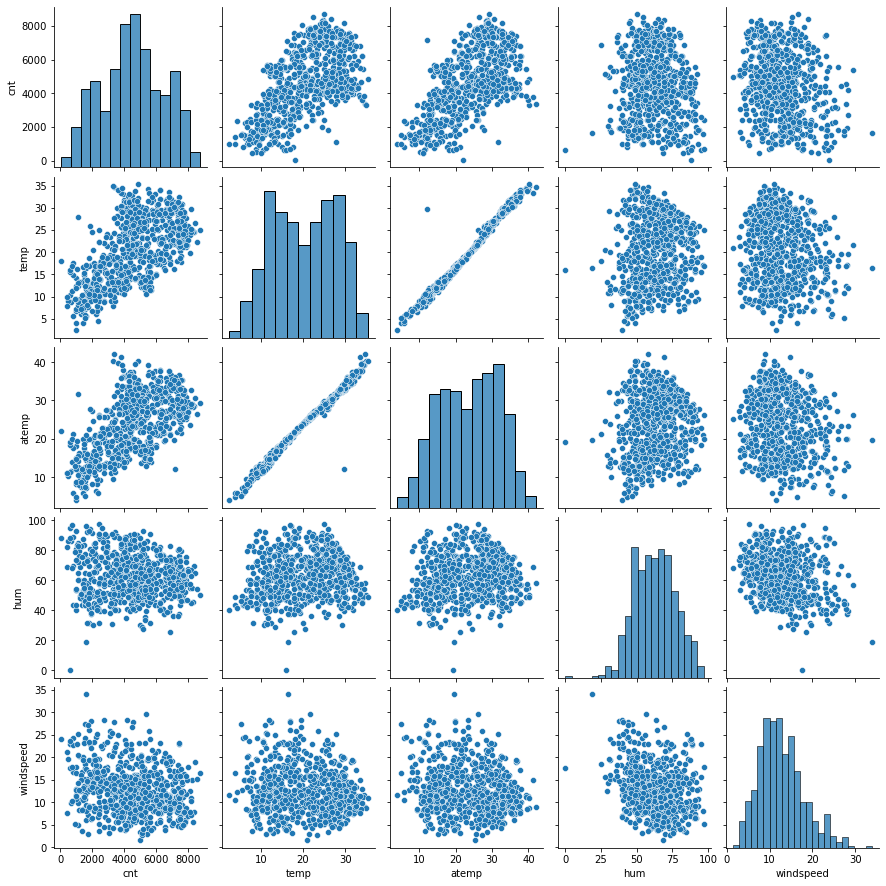

In [14]:
# Getting an idea of the relations betwween all the non-categorical variables using plot
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

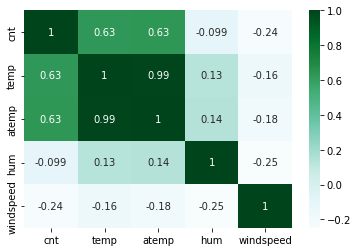

In [15]:
sns.heatmap(bikeSharing[['cnt','temp','atemp','hum','windspeed']].corr(), annot = True,cmap='BuGn')
plt.show()

In [16]:
# Looks like Temp and atemp variable is highly correlated

In [17]:
# Analysing Categorical variables

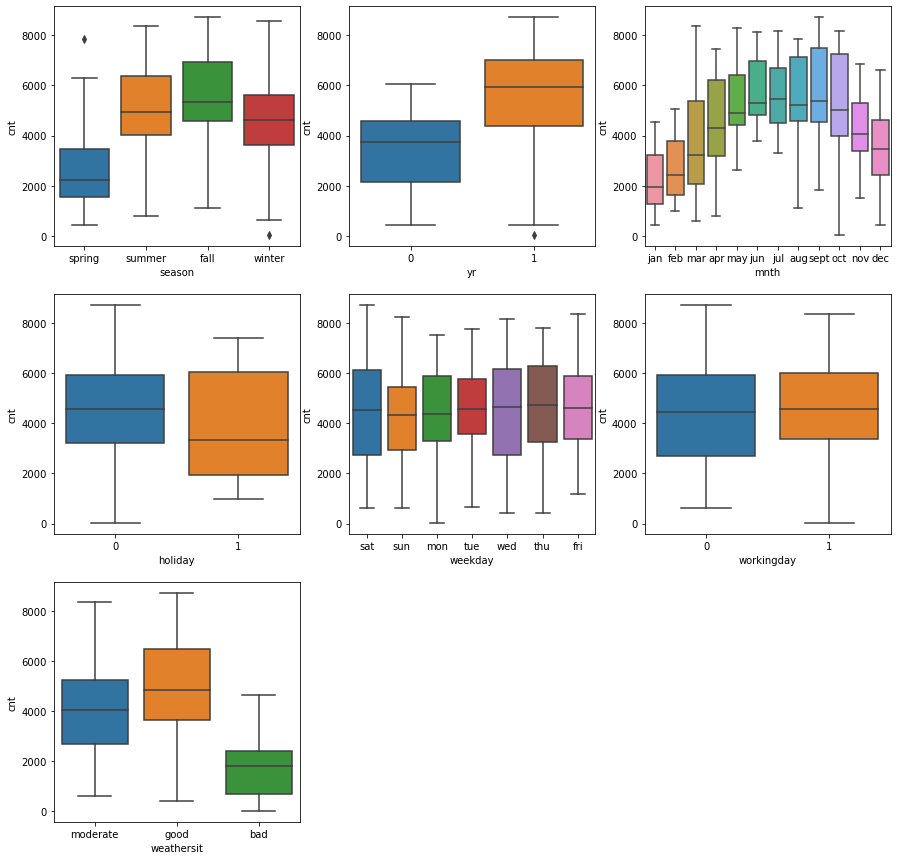

In [18]:
# Boxplot for categorical variables
cate_v = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in range(len(cate_v)):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=bikeSharing, x=cate_v[i], y='cnt')
plt.show()

In [19]:
'''
Here is the understanding from above plot
- Season Fall has highest demand for rental bikes
- Demand for year 1 (i.e. 2019) has Increased
- Demand is continuously growing each month till June.  After September, demand is decreasing
- For holidays(i.e. 1) demand has decreased.
- As the weather worsen the demand is decreasing
'''

'\nHere is the understanding from above plot\n- Season Fall has highest demand for rental bikes\n- Demand for year 1 (i.e. 2019) has Increased\n- Demand is continuously growing each month till June.  After September, demand is decreasing\n- For holidays(i.e. 1) demand has decreased.\n- As the weather worsen the demand is decreasing\n'

In [20]:
# Data Preparation for Modeling

In [21]:
# Creating Dummy variables

# Dropping the first columns as (p-1) dummies can explain p categories.
bikeSharing = pd.get_dummies(data=bikeSharing,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing = pd.get_dummies(data=bikeSharing,columns=["weathersit"])

In [22]:
bikeSharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [23]:
bikeSharing.shape

(730, 31)

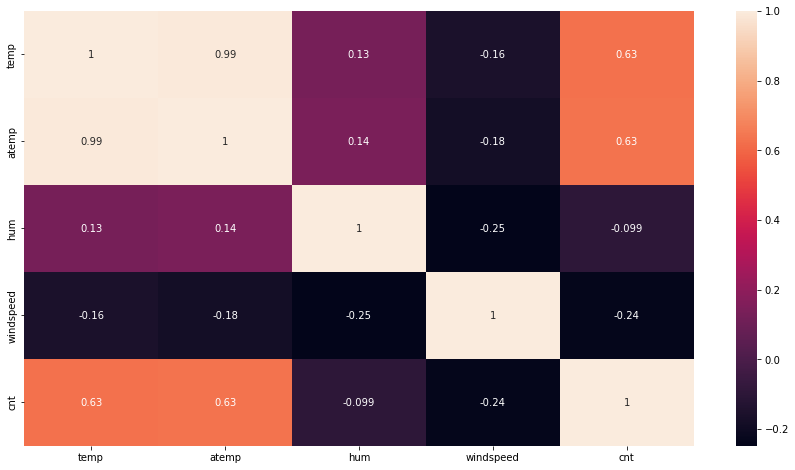

In [24]:
#Checking Corr of target variable with other numerical variables
cols = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8))
sns.heatmap(bikeSharing[cols].corr(),annot= True)
plt.show()

In [25]:
# Splitting Test and Train data
np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,1,0,0,0,0,0,0,1


In [26]:
# Scaling continuous variables
num_vars = ['temp','atemp','hum','windspeed']

scaler = MinMaxScaler()

# Scale training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,1,0,0,0,0,0,0,1


In [27]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
y_train = df_train.pop('cnt')
X_train = df_train

In [29]:
# Building Model

In [30]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

# Reducing the number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', False, 16),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 6),
 ('mnth_may', False, 11),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 4),
 ('mnth_sept', False, 14),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 13),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [31]:
#Function to build a model using statsmodel api
def get_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [32]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    X_train_vif = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = X_train_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [33]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [34]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'hum', 'season_summer', 'mnth_aug', 'mnth_feb', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [35]:
# Model1

In [36]:
# Model based on variables selected by RFE
cols =['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']
get_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.46e-186
Time:                        11:12:06   Log-Likelihood:                -4122.9
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     496   BIC:                             8333.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 701.8098    

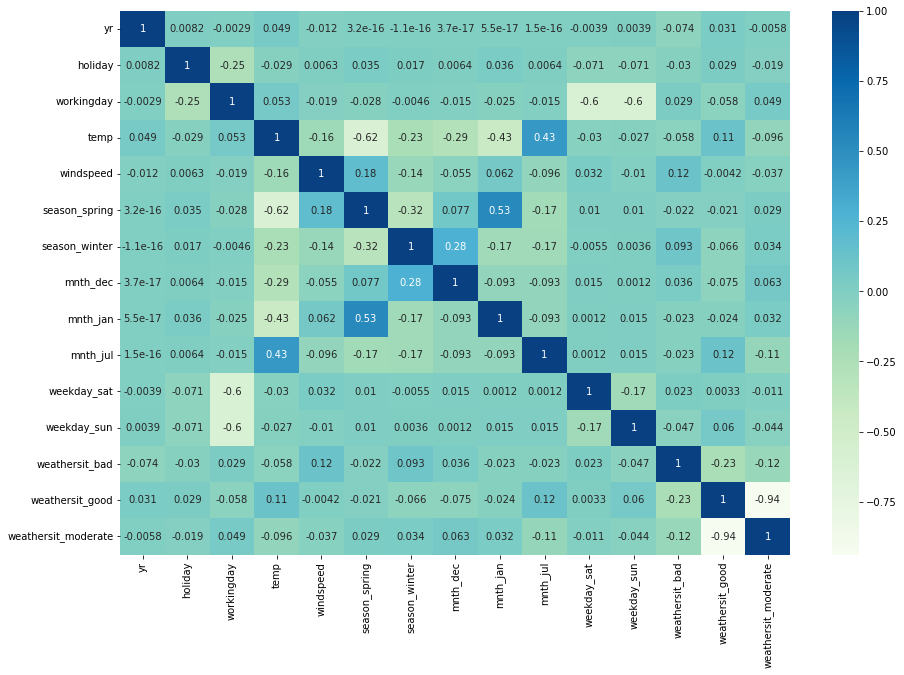

In [37]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing[['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

In [38]:
# Model 2

In [39]:
# Drpping weekday_sun as it has high p-value
cols =['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']
get_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.46e-186
Time:                        11:12:07   Log-Likelihood:                -4122.9
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     496   BIC:                             8333.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 742.3281    

In [40]:
# Model 3

In [41]:
# Drpping holiday as it has p-value > 0.05
cols =['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'weekday_sat', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']
get_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          5.61e-187
Time:                        11:12:07   Log-Likelihood:                -4124.7
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     497   BIC:                             8330.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 698.7188    

In [42]:
# Model 4

In [43]:
# Drpping weathersit_good as it has vif
cols =['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'weekday_sat', 'weathersit_bad',
       'weathersit_moderate']
get_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          5.61e-187
Time:                        11:12:07   Log-Likelihood:                -4124.7
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     497   BIC:                             8330.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.3158    

In [44]:
#Model 5

In [45]:
# Drpping temp as it has vif > 5
cols =['yr', 'workingday', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul', 'weekday_sat', 'weathersit_bad',
       'weathersit_moderate']
get_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     155.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          3.08e-153
Time:                        11:12:07   Log-Likelihood:                -4207.4
No. Observations:                 510   AIC:                             8439.
Df Residuals:                     498   BIC:                             8490.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4645.2557    

In [46]:
# R-squared value decresed significantly

In [47]:
# Model 6

In [48]:
# Drpping mnth_jul as it has p-value
cols =['yr', 'workingday', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jan', 'weekday_sat', 'weathersit_bad',
       'weathersit_moderate']
get_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     171.4
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.36e-154
Time:                        11:12:07   Log-Likelihood:                -4207.4
No. Observations:                 510   AIC:                             8437.
Df Residuals:                     499   BIC:                             8483.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4653.9229    

In [49]:
# Model 7

In [50]:
# Drpping mnth_jan as it has high correlation with season_spring
cols =['yr', 'workingday', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'weekday_sat', 'weathersit_bad',
       'weathersit_moderate']
get_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.43e-148
Time:                        11:12:07   Log-Likelihood:                -4224.3
No. Observations:                 510   AIC:                             8469.
Df Residuals:                     500   BIC:                             8511.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4616.5568    

In [51]:
# Model 8

In [52]:
# Drpping mnth_dec as it has high correlation with season_spring
cols =['yr', 'workingday', 'windspeed', 'season_spring',
       'season_winter', 'weekday_sat', 'weathersit_bad',
       'weathersit_moderate']
get_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          8.80e-147
Time:                        11:12:07   Log-Likelihood:                -4230.7
No. Observations:                 510   AIC:                             8479.
Df Residuals:                     501   BIC:                             8518.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4605.7767    

In [53]:
# Model 9

In [54]:
# adding variable 'temp'
cols =['yr', 'workingday','temp', 'windspeed', 'season_spring',
       'season_winter', 'weekday_sat', 'weathersit_bad',
       'weathersit_moderate']
get_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     263.5
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.85e-183
Time:                        11:12:08   Log-Likelihood:                -4141.5
No. Observations:                 510   AIC:                             8303.
Df Residuals:                     500   BIC:                             8345.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1923.6655    

In [55]:
# Model 10

In [56]:
# dropping variable 'workingday'
cols =['yr','temp', 'windspeed', 'season_spring',
       'season_winter', 'weekday_sat', 'weathersit_bad',
       'weathersit_moderate']
get_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     280.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.03e-179
Time:                        11:12:08   Log-Likelihood:                -4153.3
No. Observations:                 510   AIC:                             8325.
Df Residuals:                     501   BIC:                             8363.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2312.2478    

In [57]:
# Model 11

In [58]:
# dropping variable 'weekday_sat'
cols =['yr','temp', 'windspeed','mnth_jul', 'season_spring',
       'season_winter', 'weathersit_bad',
       'weathersit_moderate']
get_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     293.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.04e-183
Time:                        11:12:08   Log-Likelihood:                -4143.9
No. Observations:                 510   AIC:                             8306.
Df Residuals:                     501   BIC:                             8344.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2186.8209    

In [59]:
# Model 12

In [60]:
# Dropping variable 'windspeed'
cols =['yr','temp','mnth_jul','season_spring',
       'season_winter', 'weathersit_bad',
       'weathersit_moderate']
get_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     310.5
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          7.25e-178
Time:                        11:12:08   Log-Likelihood:                -4160.6
No. Observations:                 510   AIC:                             8337.
Df Residuals:                     502   BIC:                             8371.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1641.3825    

In [61]:
# Looks like VIF is in acceptable range and p value is also zero. Difference R squared and adj R squared is very less

In [62]:
# So this Model 12 our final model

In [63]:
# Building Model using SKLearn

In [64]:
#Let us build the finalmodel using sklearn
cols =['yr','temp','mnth_jul','season_spring',
       'season_winter', 'weathersit_bad',
       'weathersit_moderate']
#Build a model with above columns
lr = LinearRegression()
lr.fit(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1641.3824945219867 [ 2022.75005317  4282.95282996  -699.24685711  -998.91584161
   457.73838515 -2532.93507347  -659.94481841]


In [65]:
# Model Evaluation

In [66]:
y_train_pred = lr.predict(X_train[cols])

Text(0.5, 0, 'Errors')

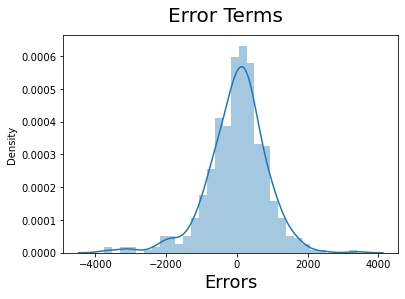

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)       

In [68]:
# Error is normally distributed

In [69]:
# Evaluating the model on test data

In [70]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,0,0.837241,0.778767,0.534223,0.149393,6043,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,6211,0,1,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,2659,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,4780,0,0,...,0,0,0,0,0,0,1,0,1,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,4968,0,1,...,0,0,0,0,1,0,0,0,1,0


In [71]:
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
cols =['yr','temp','mnth_jul','season_spring',
       'season_winter', 'weathersit_bad',
       'weathersit_moderate']
#Build a model with above columns
y_test_pred = lr.predict(X_test[cols])

In [73]:
# Lets check the r2 value of test data
r2_score(y_test,y_test_pred)

0.8034428401723772

Text(0, 0.5, 'y_pred')

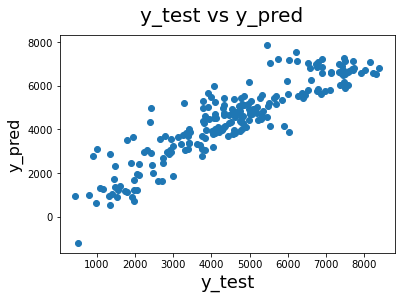

In [74]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [75]:
# Ploting actual data and predicted Data

Text(0, 0.5, 'Counts')

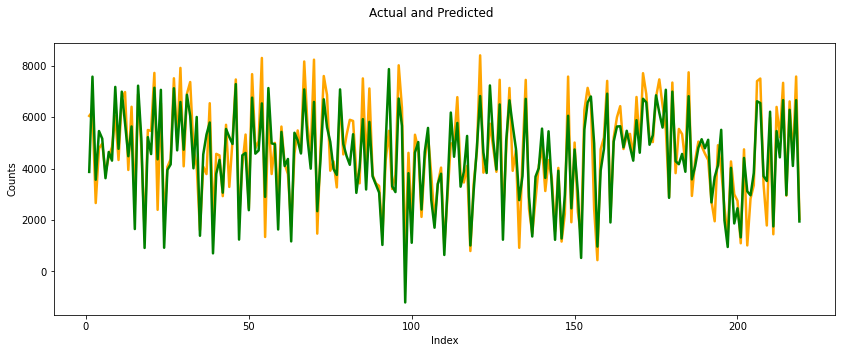

In [76]:
length = len(y_test)+1
arr = [i for i in range(1,length,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(arr,y_test, color="orange", linewidth=2.5, linestyle="-")
plt.plot(arr,y_test_pred, color="green",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted')   
plt.xlabel('Index')  
plt.ylabel('Counts') 

In [77]:
# Predicted line almost follows Actual line

In [78]:
#Conclusion

In [79]:
# Below are the significant variable we found using the the model 

In [80]:
'''
yr
temp
mnth_jul
season_spring
season_winter
weathersit_bad
weathersit_moderate
'''

'\nyr\ntemp\nmnth_jul\nseason_spring\nseason_winter\nweathersit_bad\nweathersit_moderate\n'